<a href="https://colab.research.google.com/github/brunobf09/Planos-de-Voo-Automatizados/blob/main/%5BPROJETO%5D_Plano_de_Voo_Automatizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatizando Planos de Voo**
###Como evitar tarefas repetitivas no seu dia-dia###
*by* **Bruno Brasil**


---






É comum que em nossa rotina tenhamos tarefas que sejam repetitivas. Dependendo do grau de importância dessas atividades e/ou duração para concluí-las, pode ser demandado, do responsável, uma alta carga mental e até mesmo física.

Hoje em dia, é difícil encontrar um profissional que não passe boa parte de toda a sua jornada de trabalho sentado na frente de um computador, preenchendo relatórios e gerenciando planilhas. 

Após repetir o mesmo processo diversas vezes, é normal que ao final, nossa mente esteja esgotada a ponto de errar algo considerado relativamente fácil. 

<center><img width="50%" src = "https://image.freepik.com/vetores-gratis/funcionario-cansado-exausto-com-o-trabalho_74855-4820.jpg">

Além do cansaço mental, o fato de ficar horas sentado pode causar sobrecarga do fluxo gastrointestinal, sobrecarga do fluxo sanguíneo e lesão por esforço repetitivo.

Dentro do meu contexto, como piloto da Força Aérea, trouxe a solução de uma tarefa repetitiva, de grande importância que por vezes é maçante: preencher planos de voo.



#Automatizando Planos de Voo

<left><img width="60%" src= "https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-aeronave_114360-5275.jpg">

Já imaginou a seguinte situação: 

Um avião de caça tem que lançar uma bomba em um fábrica de armamentos inimigo, mas ao passar o plano de voo ele coloca a coordenada do alvo errada!

ou

Em uma evacuação aeromédica o piloto coloca o horário errado de decolagem no seu plano e atrasa a decolagem de um paciente em estado grave.

As duas situações são consideradas absurdas, mas diante do grau de responsabilidade e estresse natural da missão, será que seria possível o erro do piloto ao preencher o plano de voo? E se ele estivesse sobrecarregado no momento, cansado de outras missões? E se o plano de voo fosse extenso e ele já tivesse preenchido diversos outros?

Os dois casos são extremos, mas existem fatores externos que aumentam a chance do erro humano. Uma forma de lidar com isso é a automatização de tarefas.

Para iniciar nosso projeto irei apresentar duas bibliotecas da linguagem em Python.

*   Pdfpumbler
*   Openpyxl

Basicamente, Pdfpumbler permite obter informações detalhadas sobre cada caractere de texto e extrair tabelas de arquivos pdf. Já o Openpyxl, permite ler e escrever no excel.

O objetivo desse artigo é extrair dados de uma missão e preencher um plano de voo automaticamente.




##Extraindo dados de um PDF

Devido ao sigilo da atividade de natureza militar foi criada uma sequência extensa de uma missão fictícia.

Para entender os dados:

* DEP -> *Departure*
* ETA -> *Estimated time of arrival*
* ARR -> *Arrival*
* TEV -> Tempo estimado de voo
* ALT -> Alternativa
* CMB -> Combustível
* DISP -> Disponibilidade


> Nos campos DEP e ARR o nome das localidades estão designadas pelas suas siglas ICAO.







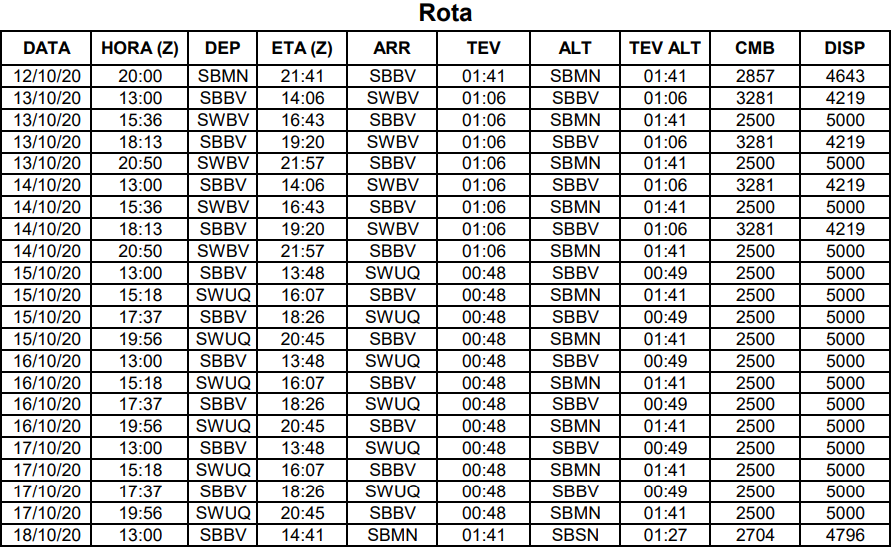

Seria exaustivo preencher um plano de voo para cada rota. Então iremos utilizar a biblioteca Pdfplumber para extrair essas rotas do pdf. Ao utilizar `.find_tables` e `.extract()` podemos extrair a tabela do pdf e criar um *dataframe*.

In [1]:
# Instalando pdfpumbler 
!pip install pdfplumber -q

# Importando bibliotecas
import pdfplumber
import pandas as pd

     |████████████████████████████████| 51kB 3.9MB/s 
     |████████████████████████████████| 5.6MB 8.9MB/s 
     |████████████████████████████████| 143kB 44.4MB/s 
     |████████████████████████████████| 1.9MB 45.7MB/s 


In [3]:
# Extraindo dados do PDF
pln =  pdfplumber.open("/content/arquivo.pdf")
table = pln.pages[0].find_tables()[2].extract()


# Criando dataframe a partir dos dados do pdf
df = pd.DataFrame(data = table[1:], columns = table[0])

Com poucas linhas de códigos as informações do pdf já foram extraídas e foi criado um dataframe chamado `df`

Temos quase todos os dados, ficou faltando somente autonomia, que basicamente é dividir a quantidade combustível pelo consumo/hora.

In [ ]:
# Criando a coluna autonomia
import datetime

autonomia = []
for i in range(df.shape[0]):
  time = float(df['CMB'][i])/700
  hora = str(datetime.timedelta(hours=time)).rsplit(':',1)[0]
  
  autonomia.append(hora)

df['Autonomia']= autonomia

Nosso *dataframe* final.

In [ ]:
# Dataframe final 
df

,DATA,HORA (Z),DEP,ETA (Z),ARR,TEV,ALT,TEV ALT,CMB,DISP,Autonomia
0,12/10/20,20:00,SBMN,21:41,SBBV,01:41,SBMN,01:41,2857,4643,4:04
1,13/10/20,13:00,SBBV,14:06,SWBV,01:06,SBBV,01:06,3281,4219,4:41
2,13/10/20,15:36,SWBV,16:43,SBBV,01:06,SBMN,01:41,2500,5000,3:34
3,13/10/20,18:13,SBBV,19:20,SWBV,01:06,SBBV,01:06,3281,4219,4:41
4,13/10/20,20:50,SWBV,21:57,SBBV,01:06,SBMN,01:41,2500,5000,3:34
5,14/10/20,13:00,SBBV,14:06,SWBV,01:06,SBBV,01:06,3281,4219,4:41
6,14/10/20,15:36,SWBV,16:43,SBBV,01:06,SBMN,01:41,2500,5000,3:34
7,14/10/20,18:13,SBBV,19:20,SWBV,01:06,SBBV,01:06,3281,4219,4:41
8,14/10/20,20:50,SWBV,21:57,SBBV,01:06,SBMN,01:41,2500,5000,3:34
9,15/10/20,13:00,SBBV,13:48,SWUQ,00:48,SBBV,00:49,2500,5000,3:34


## Preenchendo Formulário no Excel

Para exemplificar o preenchimento do plano de voo, foi criado um formulário no excel.

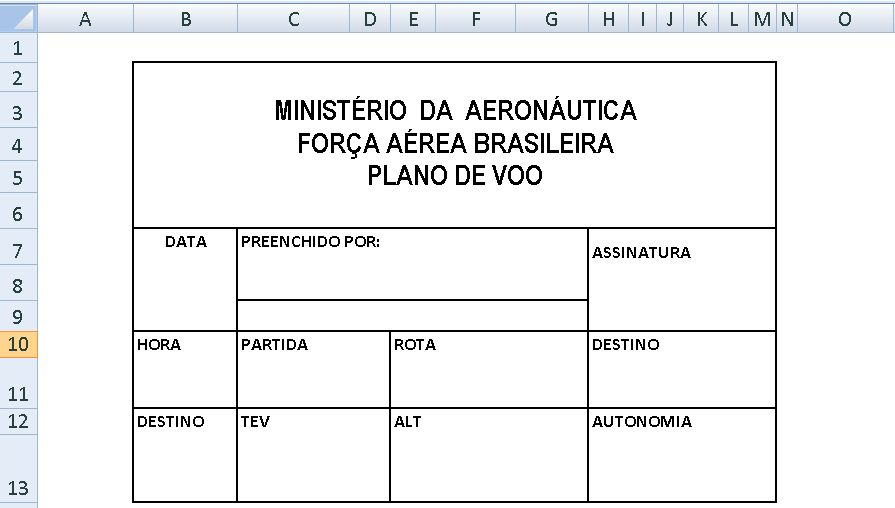

Com todos os dados para o preenchimento do plano, vamos iniciar a manipulação dos dados no excel com Openpyxl.

In [17]:
# Importando biblioteca para trabalhar no excel
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Carregando arquivo
wb = load_workbook('/content/planodevoo.xlsx')

#  Selecionando planilha
plano = wb['pln']

In [ ]:
# Unzip de assinaturas para inserir no excel
!unzip /content/assinatura.zip

In [18]:
#Preenchendo o Plano de voo no excel
for i in range(df.shape[0]):
  
  plano['B8'] = df['DATA'][i]
  plano['C8'] = "Bruno Brasil"
  plano['B11'] = df['HORA (Z)'][i]
  plano['C11'] = df['DEP'][i]
  plano['B13'] = df['ARR'][i]
  plano['C13'] = df['TEV'][i]
  plano['E13'] = df['ALT'][i]
  plano['H13'] = df['Autonomia'][i]
  
# Nominando o worksheet
  plano.title = "Etapa"+str(i+1) 

# Copiando worksheet
  wb.copy_worksheet(plano) 

# Ativando worksheet e inserindo assinatura
  wb.active = (i+1)
  wb.active.add_image(Image('assinatura'+str(i+1)+'.png'), 'I8')

# Removendo modelo e salvando o arquivo final
wb.remove(plano)
wb.save('plano.xlsx')

Para cada célula do excel que devia ser preenchida, foi feito uma manipulação do dado extraído do PDF e inserido na célula correspondente do formulário.

DICA: Às vezes o excesso de automatização pode te trair. A função `input()` poderia ser utilizado para alguns casos que não são tão repetitivos, como o campo "Rota".



Um importante detalhe é que o Openpyxl não copia as imagens quando gera novas planilhas e também não é possível inserir a imagem com o mesmo nome. Por isso foram zipadas 22 assinaturas com nomes diferentes.

Resultado final:

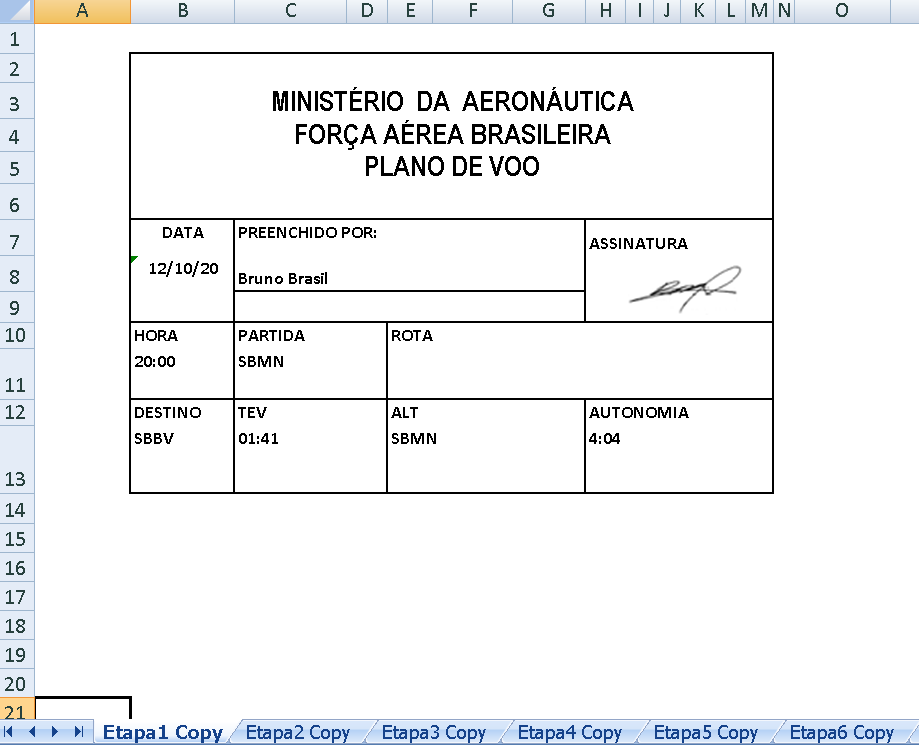


Agora é só imprimir os planos e o trabalho de horas foi executado em minutos!!

##Conclusão

<img src="https://image.freepik.com/fotos-gratis/robo-de-quatro-bracos-com-lapis-conceito-de-multitarefa-ilustracao-3d_1401-1401.jpg"> 







Esse foi um exemplo curto que trouxe do meu dia-a-dia para mostrar que automatizar tarefas repetitivas é fundamental para evitar erros devido à fadiga humana.

Ser capaz de ganhar tempo para empresa e aumentar a eficiência do processo administrativo é essencial para se destacar profissionalmente.

Recomendo o livro ["Automate the Boring Stuff with Python, 2nd Edition: Practical Programming for Total Beginners" ](https://automatetheboringstuff.com/), por Al Sweigart, livro de fácil entendimento mesmo para quem nunca programou. 